In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [22]:
data_dir = "/home/solomon/Downloads/mnist"
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Extracting /home/solomon/Downloads/mnist/train-images-idx3-ubyte.gz
Extracting /home/solomon/Downloads/mnist/train-labels-idx1-ubyte.gz
Extracting /home/solomon/Downloads/mnist/t10k-images-idx3-ubyte.gz
Extracting /home/solomon/Downloads/mnist/t10k-labels-idx1-ubyte.gz


0.9485
0.9196


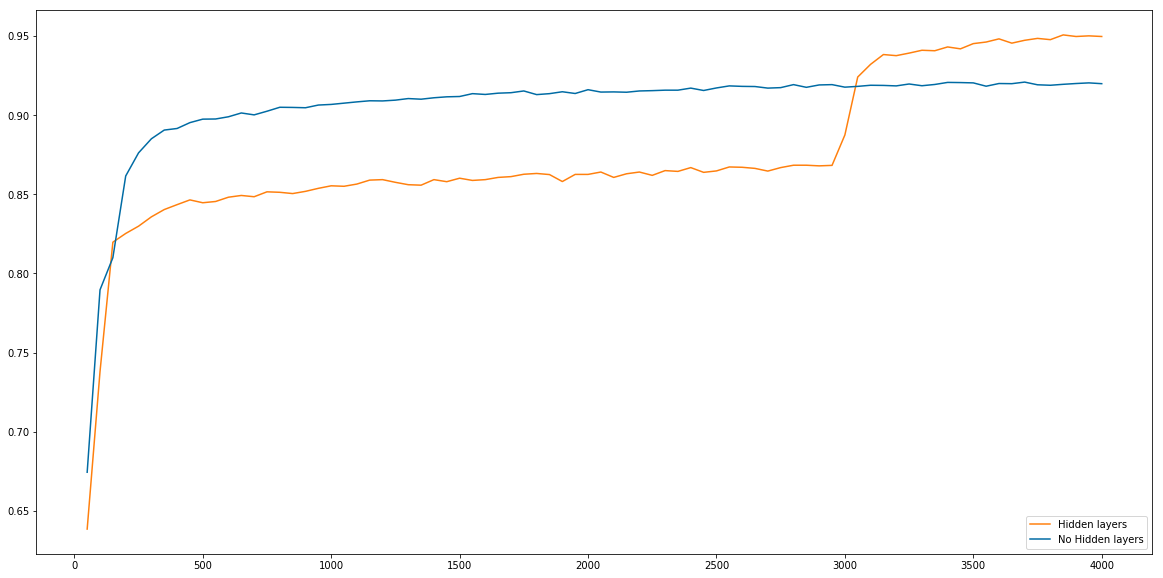

In [24]:
# Create the model
LAYER1_NODE = 100

data = {
    "x": [],
    "y0": [],
    "y1": [],
}

def train(y, y_):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf.argmax(y_, 1), logits=y)
    cross_entropy_mean = tf.reduce_mean(cross_entropy)
    return tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy_mean)

def acc(y, y_):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.float32, [None, 10])

    # W = tf.Variable(tf.zeros([784, 10]))
    W = tf.Variable(tf.truncated_normal([784, 10], stddev=0.1))
    b = tf.Variable(tf.zeros([10]))

    W1 = tf.Variable(tf.truncated_normal([784, LAYER1_NODE], stddev=0.1))
    b1 = tf.Variable(tf.zeros([LAYER1_NODE]))
    W2 = tf.Variable(tf.truncated_normal([LAYER1_NODE, 10], stddev=0.1))
    b2 = tf.Variable(tf.zeros([10]))

    # 带隐藏层
    layer = tf.nn.relu(tf.matmul(x, W1) + b1)
    y0 = tf.nn.softmax(tf.matmul(layer, W2) + b2)
    
    # 不带隐藏层
    y1 = tf.nn.softmax(tf.matmul(x, W) + b)
    
    # 不带激活函数
    # y = tf.matmul(x, W) + b

    train_step0 = train(y0, y_)    
    accuracy0 = acc(y0, y_)
    
    train_step1 = train(y1, y_)    
    accuracy1 = acc(y1, y_)
    
    tf.global_variables_initializer().run()

    test_feed = {
        x: mnist.test.images,
        y_: mnist.test.labels,
    }
    
    # Train
    for i in range(1, 4001):
        if i % 50 == 0:
            validate_acc0 = sess.run(accuracy0, feed_dict=test_feed)
            validate_acc1 = sess.run(accuracy1, feed_dict=test_feed)
            data["x"].append(i)
            data["y0"].append(validate_acc0)
            data["y1"].append(validate_acc1)
        
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step0, feed_dict={x: batch_xs, y_: batch_ys})
        sess.run(train_step1, feed_dict={x: batch_xs, y_: batch_ys})

    # Test trained model
    print(sess.run(accuracy0, feed_dict=test_feed))
    print(sess.run(accuracy1, feed_dict=test_feed))

cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(data["x"], data["y0"], c=cb_orange, label="Hidden layers")
ax.plot(data["x"], data["y1"], c=cb_dark_blue, label="No Hidden layers")
plt.legend(loc="lower right")
plt.show()